In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14

from theme import colors

In [2]:
def hist_aggegate(x, y, bins):
    bin_edges = np.linspace(np.min(x), np.max(x), bins+1)
    y_l = []
    for i in range(bins):
        m = ((x >= bin_edges[i]) & (x < bin_edges[i+1]))
        y_l.append(y[m])
        
    return y_l, bin_edges

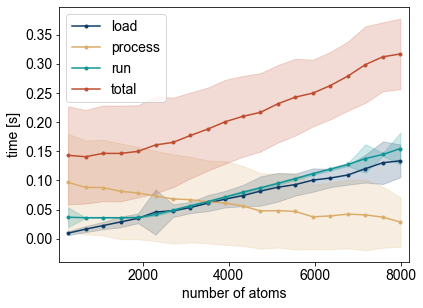

/tmp/ipykernel_6702/1989488935.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_profile.mean())


num_atoms    2986.635014
num_res       379.033129
load            0.053119
process         0.068536
run             0.059744
total           0.181400
dtype: float64

/tmp/ipykernel_6702/1989488935.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_profile.std())


num_atoms    1844.925764
num_res       237.483782
load            0.034634
process         0.076038
run             0.031104
total           0.087514
dtype: float64

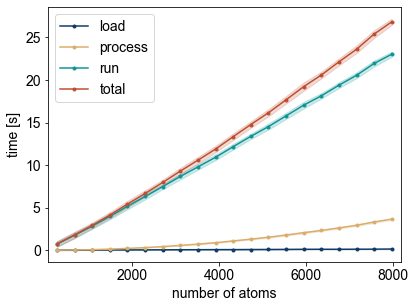

/tmp/ipykernel_6702/1989488935.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_profile.mean())


num_atoms    2892.475438
num_res       366.829475
load            0.055297
process         0.674693
run             8.061039
total           8.791030
dtype: float64

/tmp/ipykernel_6702/1989488935.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_profile.std())


num_atoms    1784.878122
num_res       229.134575
load            0.033111
process         0.792585
run             5.208124
total           6.006929
dtype: float64

In [3]:
# change default colors
colors = ['#0d3b66', '#dbad6a', '#0e9595', '#bf4e30']

## parameters
min_num_atoms = 64
max_num_atoms = 8*1024

# profiles analysis
for profile in ["cuda", "cpu"]:
    # load dataframe
    df_profile = pd.read_csv("results/interface_ppi_{}_profiling.csv".format(profile))

    # plot
    #plt.figure(figsize=(5,4.5))
    plt.figure(figsize=(6,4.5))
    for i, stage in enumerate(["load", "process", "run", "total"]):

        y_l, xe = hist_aggegate(df_profile['num_atoms'].values, df_profile[stage].values, 20)
        x = 0.5*(xe[:-1] + xe[1:])
        my = np.array([np.mean(y) for y in y_l])
        sy = np.array([np.std(y) for y in y_l])

        #plt.errorbar(x, my, yerr=sy, fmt='d', label=stage)
        plt.plot(x, my, '.-', label=stage, color=colors[i])
        plt.fill_between(x, my-sy, my+sy, color=colors[i], alpha=0.2)

    plt.xlim(min_num_atoms, max_num_atoms)
    plt.legend(loc='best')
    plt.xlabel("number of atoms")
    plt.ylabel("time [s]")
    plt.tight_layout()
    plt.savefig("results/interface_ppi_{}_profiling.svg".format(profile))
    plt.savefig("results/interface_ppi_{}_profiling.png".format(profile), dpi=300)
    plt.show()
    
    # debug display
    display(df_profile.mean())
    display(df_profile.std())

In [4]:
profile = "cuda"
df_profile = pd.read_csv("results/interface_ppi_{}_profiling.csv".format(profile))